In [2]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings # supress warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.preprocessing import StandardScaler


In [16]:
x=np.arange(1,100)
print(len(x))

99


In [21]:
y=[]

for i in range(len(x)):
    y.append(x[i]**2)

y

[1,
 4,
 9,
 16,
 25,
 36,
 49,
 64,
 81,
 100,
 121,
 144,
 169,
 196,
 225,
 256,
 289,
 324,
 361,
 400,
 441,
 484,
 529,
 576,
 625,
 676,
 729,
 784,
 841,
 900,
 961,
 1024,
 1089,
 1156,
 1225,
 1296,
 1369,
 1444,
 1521,
 1600,
 1681,
 1764,
 1849,
 1936,
 2025,
 2116,
 2209,
 2304,
 2401,
 2500,
 2601,
 2704,
 2809,
 2916,
 3025,
 3136,
 3249,
 3364,
 3481,
 3600,
 3721,
 3844,
 3969,
 4096,
 4225,
 4356,
 4489,
 4624,
 4761,
 4900,
 5041,
 5184,
 5329,
 5476,
 5625,
 5776,
 5929,
 6084,
 6241,
 6400,
 6561,
 6724,
 6889,
 7056,
 7225,
 7396,
 7569,
 7744,
 7921,
 8100,
 8281,
 8464,
 8649,
 8836,
 9025,
 9216,
 9409,
 9604,
 9801]

In [1]:
#create x,y arrays

x=np.arange(1,15)
y=np.array([1,4,6,8,7,5,6,7,8,7,8,8,8,8,8])

#draw scatter plot

plt.scatter(x,y)
plt.xlabel("area")
plt.ylabel("price")

NameError: name 'np' is not defined

1.6914285714285713
0.5436793422404933


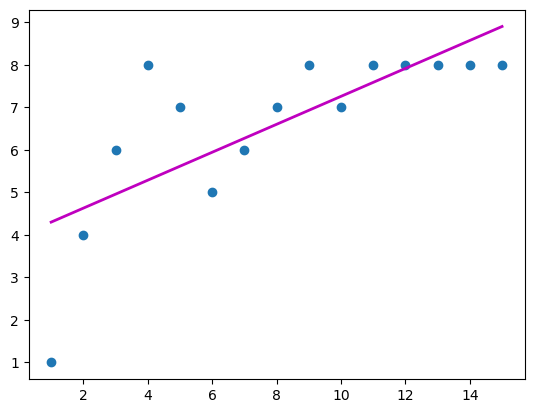

In [4]:
#linear regression

x = x.reshape(-1,1)
y = y.reshape(-1,1)

#train model
model = LinearRegression()
model.fit(x,y)
y_pred = model.predict(x)

#plot scatterplot
plt.scatter(x,y)

#plot regression_line
plt.plot(x,y_pred, color='m', linewidth=2)

mse=mean_squared_error(y, y_pred)
print(mse)

r2= r2_score(y, y_pred)
print(r2)

<AxesSubplot:>

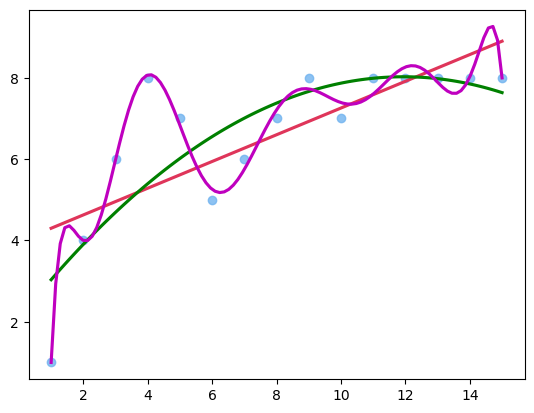

In [5]:
#train model

sns.regplot(x=x,y=y,order=1, scatter_kws={'color': '#71b3ef'}, line_kws={'color': '#df355a'}, ci=None)
sns.regplot(x=x,y=y,order=2, scatter=False, line_kws={'color': 'g'}, ci=None)
sns.regplot(x=x,y=y,order=10, scatter=False, line_kws={'color': 'm'}, ci=None)

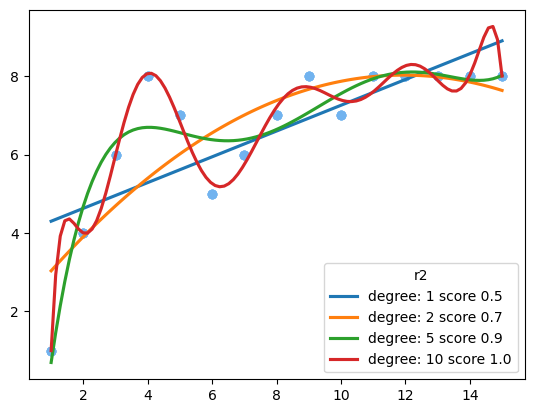

In [6]:
#train model

degrees = [1,2,5,10]

model_scores=[]

for i in degrees:  
    poly = PolynomialFeatures(degree=i)
    poly_features = poly.fit_transform(x.reshape(-1, 1))
    poly_reg_model = LinearRegression()
    poly_reg_model.fit(poly_features, y)
    y_pred = poly_reg_model.predict(poly_features)
    r2= r2_score(y, y_pred)

    plt.scatter(x, y, color='#71b3ef')
    
    sns.regplot(x=x,y=y_pred,order=i, scatter=False,  ci=None, label='degree: '+str(i)+' score '+str(round(r2, 1)))
    
    
    
plt.legend( loc='lower right', title="r2")    
plt.show()

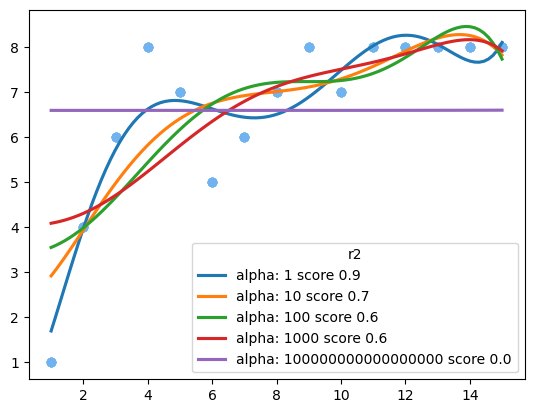

In [37]:
alphas = [1,10,100, 1000, 100000000000000000]
d=6

model_scores=[]

for i in alphas:
    
    poly = PolynomialFeatures(degree=d)
    poly_features = poly.fit_transform(x.reshape(-1, 1))
    
    model_ridge = Ridge(alpha = i)
    model_ridge.fit(poly_features, y)

    
    y_pred = model_ridge.predict(poly_features)
    
    r2= r2_score(y, y_pred)

    plt.scatter(x, y, color='#71b3ef')
    
    sns.regplot(x=x,y=y_pred, order=d, scatter=False,  ci=None, label='alpha: '+str(i)+' score '+str(round(r2, 1)))
    
plt.legend( loc='lower right', title="r2")    
plt.show()